# Databases Pt. 2
Guest lecture by Bradley Dice, [@bdice](https://github.com/bdice/).

## Example, continued: *IMBD*, Index of Marvel data with Bradley Dice
The code below sets up the movie database that we created last time, all in one cell.

In [1]:
import sqlite3
import os

database = 'movie_ratings.sqlite'

# Removes the database if it already exists
if os.path.exists(database):
    os.remove(database)
    
with sqlite3.connect(database) as conn:
    # Here we create a primary key, and use "NOT NULL" to prevent inserting invalid data
    conn.execute(
        """CREATE TABLE Movies
        (id INTEGER PRIMARY KEY AUTOINCREMENT, title TEXT NOT NULL, year INTEGER NOT NULL)""")
    conn.executemany(
        """INSERT INTO Movies (title, year) VALUES (?,?)""",
        [('Iron Man', 2008),
         ('The Incredible Hulk', 2008),
         ('Iron Man 2', 2010),
         ('Thor', 2011),
         ('Captain America: The First Avenger', 2011),
         ('The Avengers', 2012),
         ('Iron Man 3', 2013),
         ('Captain America: The Winter Soldier', 2014),
         ('Avengers: Age of Ultron', 2015),
         ('Captain America: Civil War', 2016),
         ('Doctor Strange', 2016),
         ('Black Panther', 2018),
         ('Avengers: Infinity War', 2018),
        ])
    conn.execute(
        """CREATE TABLE Actors
        (id INTEGER PRIMARY KEY AUTOINCREMENT,
        first_name TEXT NOT NULL,
        last_name TEXT NOT NULL,
        character TEXT NOT NULL,
        age REAL NOT NULL)""")
    conn.executemany(
        """INSERT INTO Actors (first_name, last_name, character, age) VALUES (?,?,?,?)""",
        [('Robert', 'Downey Jr.', 'Iron Man', 53),
         ('Chris', 'Evans', 'Captain America', 37),
         ('Scarlett', 'Johansson', 'Black Widow', 33),
         ('Samuel L.', 'Jackson', 'Nick Fury', 69),
         ('Benedict', 'Cumberbatch', 'Dr. Strange', 42),
         ('Brie', 'Larson', 'Captain Marvel', 29),
         ('Chadwick', 'Boseman', 'Black Panther', 40)
        ])
    conn.execute(
        """CREATE TABLE MovieActors
        (id INTEGER PRIMARY KEY AUTOINCREMENT, movie_id INTEGER NOT NULL, actor_id INTEGER NOT NULL)""")
    conn.executemany(
        """INSERT INTO MovieActors (movie_id, actor_id) VALUES (?,?)""",
        [(1, 1), (2, 1), (3, 1), (6, 1), (7, 1), (9, 1), (10, 1), (13, 1), (5, 2), (6, 2), (8, 2), (9, 2), (10, 2), (13, 2),
        (3, 3), (6, 3), (8, 3), (9, 3), (10, 3), (13, 3), (1, 4), (3, 4), (4, 4), (5, 4), (6, 4), (8, 4), (9, 4), (13, 4),
        (11, 5), (13, 5), (10, 7), (12, 7), (13, 7)])

## JOINing ~~forces~~ tables
This demonstrates a `JOIN` operation. There are different kinds of JOINs, explained nicely in [this resource](https://community.modeanalytics.com/sql/tutorial/sql-joins/).

In [2]:
with sqlite3.connect(database) as conn:
    results = conn.execute(
        """SELECT * FROM MovieActors
        JOIN Movies ON MovieActors.movie_id = Movies.id
        JOIN Actors ON MovieActors.actor_id = Actors.id""")
    print(list(results))

[(1, 1, 1, 1, 'Iron Man', 2008, 1, 'Robert', 'Downey Jr.', 'Iron Man', 53.0), (2, 2, 1, 2, 'The Incredible Hulk', 2008, 1, 'Robert', 'Downey Jr.', 'Iron Man', 53.0), (3, 3, 1, 3, 'Iron Man 2', 2010, 1, 'Robert', 'Downey Jr.', 'Iron Man', 53.0), (4, 6, 1, 6, 'The Avengers', 2012, 1, 'Robert', 'Downey Jr.', 'Iron Man', 53.0), (5, 7, 1, 7, 'Iron Man 3', 2013, 1, 'Robert', 'Downey Jr.', 'Iron Man', 53.0), (6, 9, 1, 9, 'Avengers: Age of Ultron', 2015, 1, 'Robert', 'Downey Jr.', 'Iron Man', 53.0), (7, 10, 1, 10, 'Captain America: Civil War', 2016, 1, 'Robert', 'Downey Jr.', 'Iron Man', 53.0), (8, 13, 1, 13, 'Avengers: Infinity War', 2018, 1, 'Robert', 'Downey Jr.', 'Iron Man', 53.0), (9, 5, 2, 5, 'Captain America: The First Avenger', 2011, 2, 'Chris', 'Evans', 'Captain America', 37.0), (10, 6, 2, 6, 'The Avengers', 2012, 2, 'Chris', 'Evans', 'Captain America', 37.0), (11, 8, 2, 8, 'Captain America: The Winter Soldier', 2014, 2, 'Chris', 'Evans', 'Captain America', 37.0), (12, 9, 2, 9, 'Aveng

### Using pandas 🐼 to help us:

In [3]:
import pandas as pd
with sqlite3.connect(database) as conn:
    df = pd.read_sql('SELECT * FROM Movies', conn)
    print(df)
    df.hist('year')

    id                                title  year
0    1                             Iron Man  2008
1    2                  The Incredible Hulk  2008
2    3                           Iron Man 2  2010
3    4                                 Thor  2011
4    5   Captain America: The First Avenger  2011
5    6                         The Avengers  2012
6    7                           Iron Man 3  2013
7    8  Captain America: The Winter Soldier  2014
8    9              Avengers: Age of Ultron  2015
9   10           Captain America: Civil War  2016
10  11                       Doctor Strange  2016
11  12                        Black Panther  2018
12  13               Avengers: Infinity War  2018


So how long have these actors been doing Marvel movies, anyway?

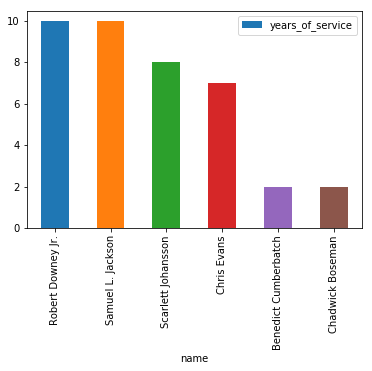

In [4]:
with sqlite3.connect(database) as conn:
    df = pd.read_sql("""SELECT MAX(Movies.year) - MIN(Movies.year) as years_of_service,
    Actors.first_name || " " || Actors.last_name as name FROM MovieActors
        JOIN Movies ON MovieActors.movie_id = Movies.id
        JOIN Actors ON MovieActors.actor_id = Actors.id
        GROUP BY name
        ORDER BY years_of_service DESC""", conn)
    df.plot.bar(x='name', y='years_of_service')

And how old were they when they started?

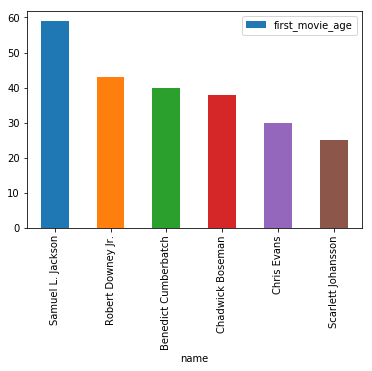

In [5]:
with sqlite3.connect(database) as conn:
    df = pd.read_sql("""SELECT Actors.age - (MAX(Movies.year) - MIN(Movies.year)) as first_movie_age,
    Actors.first_name || " " || Actors.last_name as name FROM MovieActors
        JOIN Movies ON MovieActors.movie_id = Movies.id
        JOIN Actors ON MovieActors.actor_id = Actors.id
        GROUP BY name
        ORDER BY first_movie_age DESC""", conn)
    df.plot.bar(x='name', y='first_movie_age')

We can visualize this data in many ways, including this graph. (Note that Brie Larson appears, who was absent from our earlier plots because her movie, Captain Marvel, hasn't been released yet.)

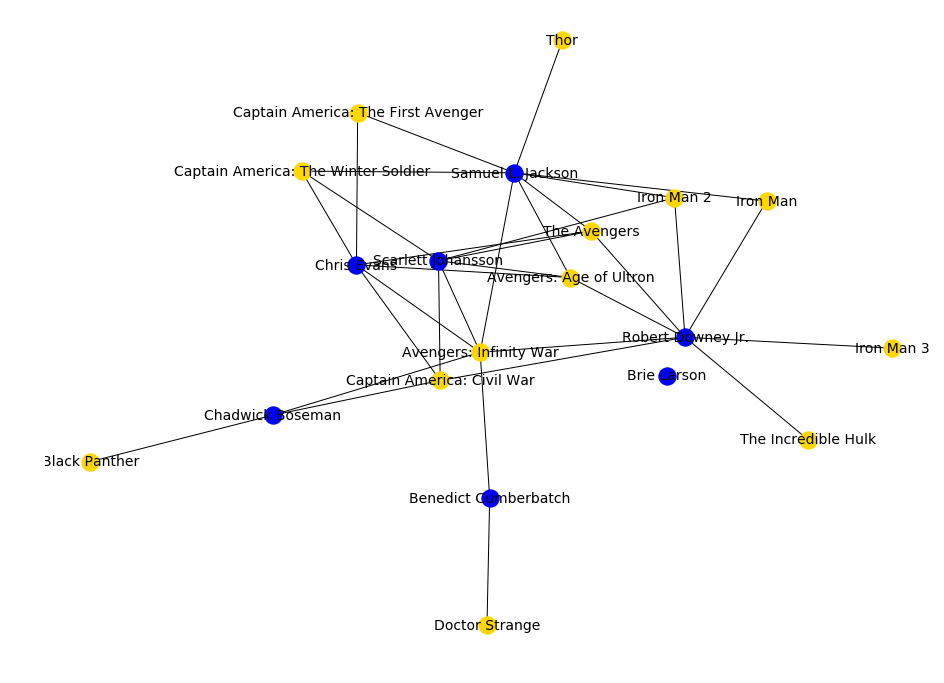

In [6]:
# Fancy demo, requires networkx
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Create a networkx Graph object
G = nx.Graph()

# Fetch data and fill the graph
with sqlite3.connect(database) as conn:
    movies = conn.execute("""SELECT title FROM Movies""")
    G.add_nodes_from([movie[0] for movie in movies], bipartite=0)
    actors = conn.execute("""SELECT first_name || " " || last_name FROM Actors""")
    G.add_nodes_from([actor[0] for actor in actors], bipartite=1)
    edges = conn.execute("""SELECT Movies.title, Actors.first_name || " " || Actors.last_name FROM MovieActors
        JOIN Movies ON MovieActors.movie_id = Movies.id
        JOIN Actors ON MovieActors.actor_id = Actors.id""")
    G.add_edges_from(edges)

# Plot the graph
plt.figure(figsize=(16, 12))
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=[n for n, d in G.nodes(data=True) if d['bipartite']==0], node_color='gold')
nx.draw_networkx_nodes(G, pos, nodelist=[n for n, d in G.nodes(data=True) if d['bipartite']==1], node_color='blue')
nx.draw_networkx_labels(G, pos, font_size=14)
nx.draw_networkx_edges(G, pos)
plt.axis('off')
plt.show()

Observation: Avengers movies are near the center! What else could we learn from this data?

What if we wanted to add ratings? What kind of mapping is needed? What table columns would we use?

## Common problems in designing relational databases
### Update anomaly
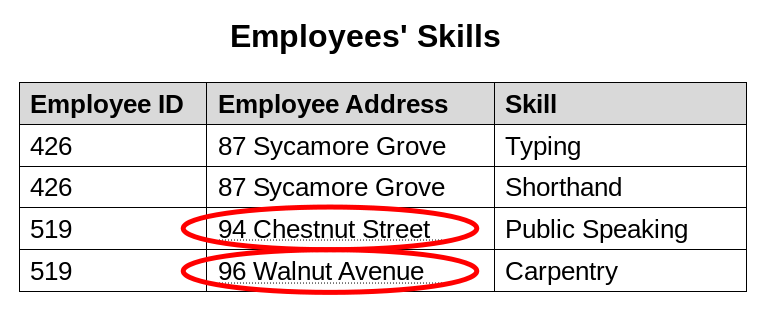
### Insertion anomaly
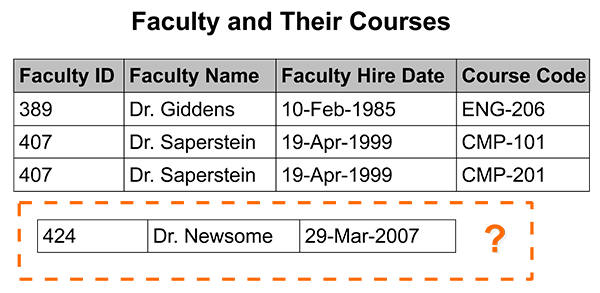
### Deletion anomaly
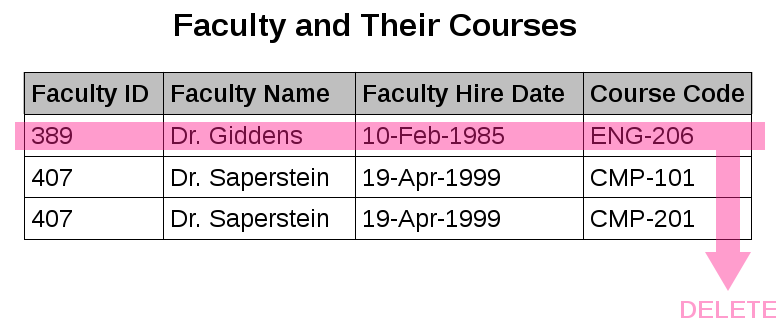

## Normal Form
There are rules to help us design relational databases! They're called "[normal form](https://en.wikipedia.org/wiki/Database_normalization)."

## Chinook Sample Database
This is a sample database [named after winds in Canada](https://github.com/lerocha/chinook-database), which is a joke from another sample database called Northwind. I picked this because it's rich and demonstrates a professional, production-level database schema.
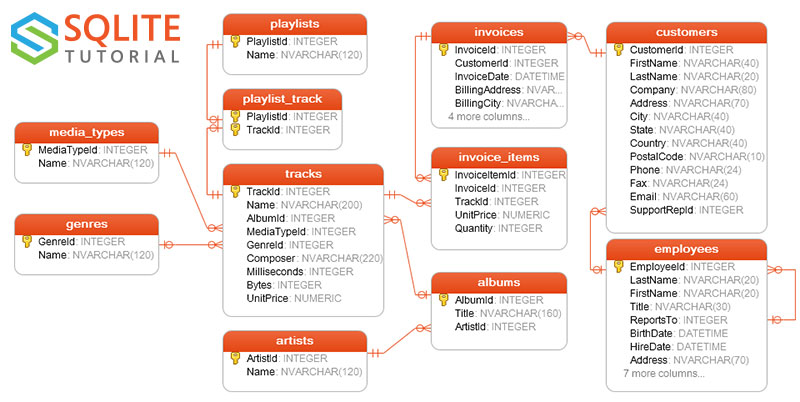

In [7]:
!echo "Removing previously downloaded database." && rm -f Chinook.sqlite
!echo "Downloading database." && curl https://raw.githubusercontent.com/lerocha/chinook-database/master/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite > Chinook.sqlite
!echo "Done. Check that the file exists:"
!ls "Chinook.sqlite"

Removing previously downloaded database.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1042k  100 1042k    0     0  1797k      0 --:--:-- --:--:-- --:--:-- 1973k
Done. Check that the file exists:
Chinook.sqlite


In [8]:
database = 'Chinook.sqlite'

from IPython.display import display

def get_results(sql, *args, **kwargs):
    with sqlite3.connect(database) as conn:
        df = pd.read_sql(sql, conn, *args, **kwargs)
    return df

def show_results(sql, *args, **kwargs):
    display(get_results(sql, *args, **kwargs))

show_results("""SELECT * FROM sqlite_master""")

type                              name       tbl_name  rootpage  \
0   table                             Album          Album         2   
1   table                            Artist         Artist         3   
2   table                          Customer       Customer         4   
3   table                          Employee       Employee         7   
4   table                             Genre          Genre         9   
5   table                           Invoice        Invoice        10   
6   table                       InvoiceLine    InvoiceLine        12   
7   table                         MediaType      MediaType        14   
8   table                          Playlist       Playlist        15   
9   table                     PlaylistTrack  PlaylistTrack        16   
10  index  sqlite_autoindex_PlaylistTrack_1  PlaylistTrack        17   
11  table                             Track          Track        19   
12  index                         IPK_Album          Album        21   
13  index                        IPK_Artist         Artist        22   
14  index                      IPK_Customer       Customer        23   
15  index                      IPK_Employee       Employee        24   
16  index                         IPK_Genre          Genre        26   
17  index                       IPK_Invoice        Invoice        27   
18  index                   IPK_InvoiceLine    InvoiceLine        28   
19  index                     IPK_MediaType      MediaType        29   
20  index                      IPK_Playlist       Playlist        30   
21  index                 IPK_PlaylistTrack  PlaylistTrack        31   
22  index                         IPK_Track          Track        32   
23  index                 IFK_AlbumArtistId          Album        33   
24  index          IFK_CustomerSupportRepId       Customer        34   
25  index             IFK_EmployeeReportsTo       Employee        36   
26  index             IFK_InvoiceCustomerId        Invoice        37   
27  index          IFK_InvoiceLineInvoiceId    InvoiceLine        38   
28  index            IFK_InvoiceLineTrackId    InvoiceLine        39   
29  index          IFK_PlaylistTrackTrackId  PlaylistTrack        40   
30  index                  IFK_TrackAlbumId          Track        41   
31  index                  IFK_TrackGenreId          Track        42   
32  index              IFK_TrackMediaTypeId          Track        43   

                                                  sql  
0   CREATE TABLE [Album]\n(\n    [AlbumId] INTEGER...  
1   CREATE TABLE [Artist]\n(\n    [ArtistId] INTEG...  
2   CREATE TABLE [Customer]\n(\n    [CustomerId] I...  
3   CREATE TABLE [Employee]\n(\n    [EmployeeId] I...  
4   CREATE TABLE [Genre]\n(\n    [GenreId] INTEGER...  
5   CREATE TABLE [Invoice]\n(\n    [InvoiceId] INT...  
6   CREATE TABLE [InvoiceLine]\n(\n    [InvoiceLin...  
7   CREATE TABLE [MediaType]\n(\n    [MediaTypeId]...  
8   CREATE TABLE [Playlist]\n(\n    [PlaylistId] I...  
9   CREATE TABLE [PlaylistTrack]\n(\n    [Playlist...  
10                                               None  
11  CREATE TABLE [Track]\n(\n    [TrackId] INTEGER...  
12  CREATE UNIQUE INDEX [IPK_Album] ON [Album]([Al...  
13  CREATE UNIQUE INDEX [IPK_Artist] ON [Artist]([...  
14  CREATE UNIQUE INDEX [IPK_Customer] ON [Custome...  
15  CREATE UNIQUE INDEX [IPK_Employee] ON [Employe...  
16  CREATE UNIQUE INDEX [IPK_Genre] ON [Genre]([Ge...  
17  CREATE UNIQUE INDEX [IPK_Invoice] ON [Invoice]...  
18  CREATE UNIQUE INDEX [IPK_InvoiceLine] ON [Invo...  
19  CREATE UNIQUE INDEX [IPK_MediaType] ON [MediaT...  
20  CREATE UNIQUE INDEX [IPK_Playlist] ON [Playlis...  
21  CREATE UNIQUE INDEX [IPK_PlaylistTrack] ON [Pl...  
22  CREATE UNIQUE INDEX [IPK_Track] ON [Track]([Tr...  
23  CREATE INDEX [IFK_AlbumArtistId] ON [Album] ([...  
24  CREATE INDEX [IFK_CustomerSupportRepId] ON [Cu...  
25  CREATE INDEX [IFK_EmployeeReportsTo] ON [Emplo...  
26  CREATE INDEX [IFK_InvoiceCustomerId] ON 

In [9]:
show_results("""PRAGMA table_info(Track)""")  # sqlite specific
show_results("""PRAGMA table_info(Genre)""")
show_results("""PRAGMA table_info(Album)""")
show_results("""PRAGMA table_info(Artist)""")

cid          name           type  notnull dflt_value  pk
0    0       TrackId        INTEGER        1       None   1
1    1          Name  NVARCHAR(200)        1       None   0
2    2       AlbumId        INTEGER        0       None   0
3    3   MediaTypeId        INTEGER        1       None   0
4    4       GenreId        INTEGER        0       None   0
5    5      Composer  NVARCHAR(220)        0       None   0
6    6  Milliseconds        INTEGER        1       None   0
7    7         Bytes        INTEGER        0       None   0
8    8     UnitPrice  NUMERIC(10,2)        1       None   0

cid     name           type  notnull dflt_value  pk
0    0  GenreId        INTEGER        1       None   1
1    1     Name  NVARCHAR(120)        0       None   0

cid      name           type  notnull dflt_value  pk
0    0   AlbumId        INTEGER        1       None   1
1    1     Title  NVARCHAR(160)        1       None   0
2    2  ArtistId        INTEGER        1       None   0

cid      name           type  notnull dflt_value  pk
0    0  ArtistId        INTEGER        1       None   1
1    1      Name  NVARCHAR(120)        0       None   0

In [10]:
show_results("""SELECT Track.Name, Album.Title, Artist.Name, Genre.Name FROM Track
JOIN Genre on Track.GenreId = Genre.GenreId
JOIN Album on Track.AlbumId = Album.AlbumId
JOIN Artist on Album.ArtistId = Artist.ArtistId""")

Name  \
0               For Those About To Rock (We Salute You)   
1                                     Balls to the Wall   
2                                       Fast As a Shark   
3                                     Restless and Wild   
4                                  Princess of the Dawn   
5                                 Put The Finger On You   
6                                       Let's Get It Up   
7                                      Inject The Venom   
8                                            Snowballed   
9                                            Evil Walks   
10                                               C.O.D.   
11                                   Breaking The Rules   
12                             Night Of The Long Knives   
13                                           Spellbound   
14                                              Go Down   
15                                          Dog Eat Dog   
16                                    Let There Be Rock   
17                                       Bad Boy Boogie   
18                                        Problem Child   
19                                             Overdose   
20                         Hell Ain't A Bad Place To Be   
21                                    Whole Lotta Rosie   
22                                        Walk On Water   
23                                  Love In An Elevator   
24                                             Rag Doll   
25                                        What It Takes   
26                             Dude (Looks Like A Lady)   
27                                    Janie's Got A Gun   
28                                               Cryin'   
29                                              Amazing   
...                                                 ...   
3473                                       October Song   
3474                               What Is It About Men   
3475                                      Help Yourself   
3476                                Amy Amy Amy (Outro)   
3477                                           Slowness   
3478                        Prometheus Overture, Op. 43   
3479                 Sonata for Solo Violin: IV: Presto   
3480  A Midsummer Night's Dream, Op.61 Incidental Mu...   
3481    Suite No. 3 in D, BWV 1068: III. Gavotte I & II   
3482  Concert pour 4 Parties de V**les, H. 545: I. P...   
3483                                       Adios nonino   
3484  Symphony No. 3 Op. 36 for Orchestra and Sopran...   
3485                                   Act IV, Symphony   
3486  3 Gymnopédies: No.1 - Lent Et Grave, No.3 - Le...   
3487  Music for the Funeral of Queen Mary: VI. "Thou...   
3488                Symphony No. 2: III. Allegro vivace   
3489          Partita in E Major, BWV 1006A: I. Prelude   
3490         Le Sacre Du Printemps: I.iv. Spring Rounds   
3491                                      Sing Joyfully   
3492                           Metopes, Op. 29: Calypso   
3493  Symphony No. 2, Op. 16 -  "The Four Temperamen...   
3494  24 Caprices, Op. 1, No. 24, for Solo Violin, i...   
3495    Étude 1, In C Major - Preludio (Presto) - Liszt   
3496                                    Erlkonig, D.328   
3497  Concerto for Violin, Strings and Continuo in G...   
3498  Pini Di Roma (Pinien Von Rom) \ I Pini Della V...   
3499  String Quartet No. 12 in C Minor, D. 703 "Quar...   
3500               L'orfeo, Act 3, Sinfonia (Orchestra)   
3501  Quintet for Horn, Violin, 2 Violas, and Cello ...   
3502                                      Koyaanisqatsi   

                                                  Title  \
0                 For Those About To Rock We Salute You   
1                                     Balls to the Wall   
2                                     Restless and Wild   
3                                     Restless and Wild   
4                                     Restless and Wild   
5                 For Those About To R

### Example Query

In [11]:
get_results("""SELECT COUNT(Track.Name) as NumTracks, Artist.Name FROM Track
JOIN Album on Track.AlbumId = Album.AlbumId
JOIN Artist on Album.ArtistId = Artist.ArtistId
GROUP BY Artist.Name ORDER BY NumTracks DESC""").head(10)

NumTracks             Name
0        213      Iron Maiden
1        135               U2
2        114     Led Zeppelin
3        112        Metallica
4         92      Deep Purple
5         92             Lost
6         67        Pearl Jam
7         57    Lenny Kravitz
8         56  Various Artists
9         53       The Office

In [12]:
show_results("""PRAGMA table_info(Customer)""")
show_results("""PRAGMA table_info(Invoice)""")
show_results("""PRAGMA table_info(InvoiceLine)""")

cid          name          type  notnull dflt_value  pk
0     0    CustomerId       INTEGER        1       None   1
1     1     FirstName  NVARCHAR(40)        1       None   0
2     2      LastName  NVARCHAR(20)        1       None   0
3     3       Company  NVARCHAR(80)        0       None   0
4     4       Address  NVARCHAR(70)        0       None   0
5     5          City  NVARCHAR(40)        0       None   0
6     6         State  NVARCHAR(40)        0       None   0
7     7       Country  NVARCHAR(40)        0       None   0
8     8    PostalCode  NVARCHAR(10)        0       None   0
9     9         Phone  NVARCHAR(24)        0       None   0
10   10           Fax  NVARCHAR(24)        0       None   0
11   11         Email  NVARCHAR(60)        1       None   0
12   12  SupportRepId       INTEGER        0       None   0

cid               name           type  notnull dflt_value  pk
0    0          InvoiceId        INTEGER        1       None   1
1    1         CustomerId        INTEGER        1       None   0
2    2        InvoiceDate       DATETIME        1       None   0
3    3     BillingAddress   NVARCHAR(70)        0       None   0
4    4        BillingCity   NVARCHAR(40)        0       None   0
5    5       BillingState   NVARCHAR(40)        0       None   0
6    6     BillingCountry   NVARCHAR(40)        0       None   0
7    7  BillingPostalCode   NVARCHAR(10)        0       None   0
8    8              Total  NUMERIC(10,2)        1       None   0

cid           name           type  notnull dflt_value  pk
0    0  InvoiceLineId        INTEGER        1       None   1
1    1      InvoiceId        INTEGER        1       None   0
2    2        TrackId        INTEGER        1       None   0
3    3      UnitPrice  NUMERIC(10,2)        1       None   0
4    4       Quantity        INTEGER        1       None   0

### Total Spending by State/Country

In [13]:
get_results("""SELECT SUM(InvoiceLine.UnitPrice) AS Spending, Customer.State, Customer.Country AS Location
FROM InvoiceLine
JOIN Invoice ON InvoiceLine.InvoiceId = Invoice.InvoiceId
JOIN Customer ON Invoice.CustomerId = Customer.CustomerId
GROUP BY Customer.State ORDER BY Spending DESC""")

Spending   State     Location
0    1150.00    None      Germany
1     115.86      CA          USA
2     114.86      SP       Brazil
3      75.24      ON       Canada
4      47.62      TX          USA
5      45.62  Dublin      Ireland
6      43.62      IL          USA
7      43.62      UT          USA
8      42.62      WI          USA
9      40.62      VV  Netherlands
10     39.62      FL          USA
11     39.62      QC       Canada
12     39.62      WA          USA
13     38.62      BC       Canada
14     37.62      AB       Canada
15     37.62      AZ          USA
16     37.62      DF       Brazil
17     37.62      MA          USA
18     37.62      MB       Canada
19     37.62      NS       Canada
20     37.62     NSW    Australia
21     37.62      NT       Canada
22     37.62      NV          USA
23     37.62      NY          USA
24     37.62      RJ       Brazil
25     37.62      RM        Italy

## Subqueries

In [14]:
show_results("""SELECT Subquery.* FROM (SELECT Artist.Name, COUNT(Artist.Name) as ArtistCount, Customer.State, Customer.Country
FROM InvoiceLine
JOIN Invoice ON InvoiceLine.InvoiceId = Invoice.InvoiceId
JOIN Customer ON Invoice.CustomerId = Customer.CustomerId
JOIN Track ON InvoiceLine.TrackId = Track.TrackId
JOIN Album ON Track.TrackId = Album.AlbumId
JOIN Artist ON Artist.ArtistId = Album.ArtistId
GROUP BY Artist.Name, Customer.State, Customer.Country) AS Subquery
""")

Name  ArtistCount   State  \
0                                                AC/DC            1    None   
1                                                AC/DC            1      RM   
2    Academy of St. Martin in the Fields & Sir Nevi...            1    None   
3    Academy of St. Martin in the Fields & Sir Nevi...            1      SP   
4    Academy of St. Martin in the Fields Chamber En...            1      MB   
5                                               Accept            1    None   
6                                               Accept            1      DF   
7                                               Accept            1      NT   
8                       Adrian Leaper & Doreen de Feis            1      NV   
9                                            Aerosmith            1      RM   
10                                           Aisha Duo            1      SP   
11                                   Alanis Morissette            1    None   
12                                       Amy Winehouse            1    None   
13                                       Amy Winehouse            1      NV   
14   Anne-Sophie Mutter, Herbert Von Karajan & Wien...            1      MB   
15            Antal Doráti & London Symphony Orchestra            1    None   
16                                Antônio Carlos Jobim            1    None   
17                                Antônio Carlos Jobim            1      NT   
18                                        Apocalyptica            1      DF   
19                                        Apocalyptica            1      RM   
20                                          Audioslave            1    None   
21                                          Audioslave            1      SP   
22                                            BackBeat            1    None   
23                      Battlestar Galactica (Classic)            1    None   
24              Berliner Philharmoniker & Hans Rosbaud            1      NV   
25       Berliner Philharmoniker & Herbert Von Karajan            1    None   
26       Berliner Philharmoniker & Herbert Von Karajan            1      SP   
27                                        Billy Cobham            1      RM   
28                                 Black Label Society            1      DF   
29                                 Black Label Society            1      NT   
..                                                 ...          ...     ...   
171                                          The Clash            1      CA   
172                                           The Cult            1      CA   
173                                          The Doors            1    None   
174                                         The Office            1      MB   
175                                         The Police            1      FL   
176                                 The Rolling Stones            1    None   
177                                 The Rolling Stones            1    None   
178                                 The Rolling Stones            1      FL   
179                                 The Rolling Stones            1      MA   
180                                      The Tea Party            1      FL   
181                                            The Who            1      FL   
182                                           Tim Maia            1    None   
183                                           Tim Maia            1    None   
184                                              Titãs            1      TX   
185                                                 U2            4    None   
186                                                 U2            1    None   
187                                                 U2            1    None   
188                                                 U2            2      RJ   
189                                                 U2            2      TX   
190                  

In [15]:
show_results("""SELECT Artist.Name as ArtistName, SUM(TrackSales.Sales) AS ArtistSales FROM (
SELECT Track.TrackId, Track.AlbumId, Track.Name, SUM(InvoiceLine.UnitPrice) AS Sales
FROM Track JOIN InvoiceLine ON Track.TrackId = InvoiceLine.TrackId
GROUP BY Track.TrackId
) AS TrackSales
JOIN Album on TrackSales.AlbumId = Album.AlbumId
JOIN Artist on Album.ArtistId = Artist.ArtistId
GROUP BY Artist.Name ORDER BY ArtistSales DESC
""")

ArtistName  ArtistSales
0                                          Iron Maiden       138.60
1                                                   U2       105.93
2                                            Metallica        90.09
3                                         Led Zeppelin        86.13
4                                                 Lost        81.59
5                                           The Office        49.75
6                              Os Paralamas Do Sucesso        44.55
7                                          Deep Purple        43.56
8                                        Faith No More        41.58
9                                         Eric Clapton        39.60
10                                              R.E.M.        38.61
11                        Creedence Clearwater Revival        36.63
12                                               Queen        36.63
13                      Battlestar Galactica (Classic)        35.82
14                                       Guns N' Roses        35.64
15                                               Titãs        33.66
16                                           Green Day        32.67
17                                           Pearl Jam        31.68
18                                                Kiss        30.69
19                                           Van Halen        28.71
20                                     Various Artists        28.71
21                               Red Hot Chili Peppers        26.73
22                                       Chico Buarque        26.73
23                                              Heroes        25.87
24                                       Lenny Kravitz        25.74
25                         Chico Science & Nação Zumbi        24.75
26                                Battlestar Galactica        23.88
27                                       Ozzy Osbourne        23.76
28                                   Smashing Pumpkins        23.76
29                                            Tim Maia        23.76
..                                                 ...          ...
135  Academy of St. Martin in the Fields, John Birc...         0.99
136                     Adrian Leaper & Doreen de Feis         0.99
137           Antal Doráti & London Symphony Orchestra         0.99
138             Berliner Philharmoniker & Hans Rosbaud         0.99
139                                           Calexico         0.99
140                                     Dread Zeppelin         0.99
141              Edo de Waart & San Francisco Symphony         0.99
142  Emanuel Ax, Eugene Ormandy & Philadelphia Orch...         0.99
143                   English Concert & Trevor Pinnock         0.99
144  Felix Schmidt, London Symphony Orchestra & Raf...         0.99
145                 Göteborgs Symfoniker & Neeme Järvi         0.99
146                             Habib Koité and Bamada         0.99
147                                       Julian Bream         0.99
148       Kent Nagano and Orchestre de l'Opéra de Lyon         0.99
149                       Luciana Souza/Romero Lubambo         0.99
150                                      Martin Roscoe         0.99
151                                   Maurizio Pollini         0.99
152                                 Michele Campanella         0.99
153              Orchestra of The Age of Enlightenment         0.99
154            Otto Klemperer & Philharmonia Orchestra         0.99
155      Philharmonia Orchestra & Sir Neville Marriner         0.99
156         Roger Norrington, London Classical Players         0.99
157  Royal Philharmonic Orchestra & Sir Thomas Beecham         0.99
158                          Scholars Baroque Ensemble         0.99
159            Sir Georg Solti & Wiener Philharmoniker         0.99
160         The 12 Cellists of The Berlin Philharmonic         0.99
161                                 The King's Singers         0.99
162                             

## Searching Databases

In [16]:
show_results("""SELECT * FROM Artist WHERE Name LIKE (?)""", params=('%foo%',))
show_results("""SELECT * FROM Artist WHERE Name LIKE (?)""", params=('%bar%',))

ArtistId          Name
0        84  Foo Fighters

ArtistId                                               Name
0        48                                     Barão Vermelho
1       213                          Scholars Baroque Ensemble
2       224           Barry Wordsworth & BBC Concert Orchestra
3       273  C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon...

## Scientific databases
Acquiring quality data with the information you might need for particular research questions is still *very hard*. Many databases found online are of low quality, or small breadth / depth. Here are some databases of various kinds of materials and bioactive molecules. In many cases, domain scientists/engineers and data scientists must collaborate to make the most out of limited information.

- https://materialsproject.org/
- http://pymatgen.org/
- https://www.ebi.ac.uk/chembl/
- https://omdb.diracmaterials.org/

## Hosting a production database
If reliability is important and/or you have some money and want to get going quickly, use a cloud provider like Amazon Web Services or Google Cloud.
- https://aws.amazon.com/products/databases/
- https://cloud.google.com/sql/

## Exploring more on your own
To learn how databases work on your own, install the `mysql-server` package on a server you have access to, or follow instructions for a LAMP (Linux, Apache, MySQL, PHP) server. The second link below has demonstrations for all kinds of other databases I mentioned previously, including several NoSQL databases.
- https://www.linode.com/docs/web-servers/lamp/install-lamp-stack-on-ubuntu-18-04/
- https://www.linode.com/docs/databases/

## Administrative interfaces
To administer MySQL databases, I really like PHPMyAdmin. It's how I learned to use databases, because its web interface shows the SQL commands when you click on the buttons.
- https://www.phpmyadmin.net/

### Sources

Database reference material:
- https://en.wikipedia.org/wiki/NoSQL
- https://docs.python.org/3.7/library/sqlite3.html
- https://community.modeanalytics.com/sql/tutorial/sql-joins/
- https://en.wikipedia.org/wiki/Database_normalization
- http://www.sqlitetutorial.net/sqlite-sample-database/

Other Python packages used:
- https://networkx.github.io/documentation/stable/
- https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.read_sql.html

Raw data:
- https://en.wikipedia.org/wiki/List_of_Marvel_Cinematic_Universe_film_actors
- https://github.com/lerocha/chinook-database